In [1]:
import warnings

warnings.filterwarnings("ignore")

In [2]:
import nbimporter  #  type: ignore
import functions
import pandas as pd  #  type: ignore

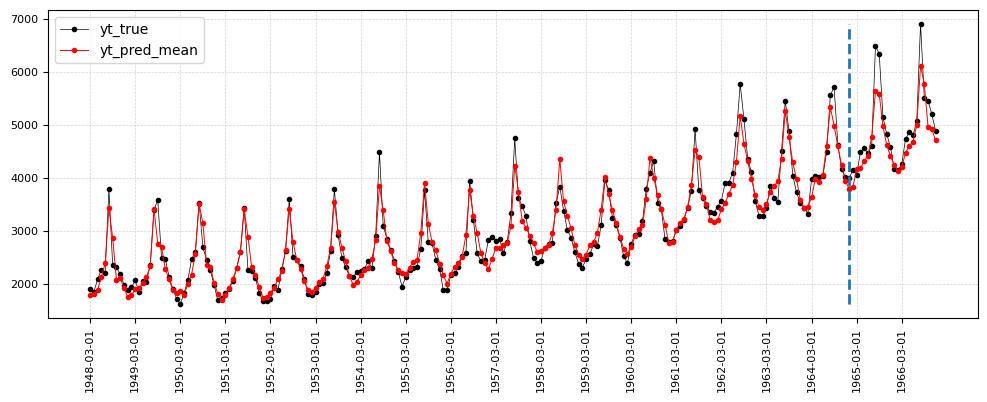

In [3]:
df_orig = pd.read_csv("../files/output/forecasts.csv")
df_dropna = df_orig.dropna()
df_dropna = df_dropna.set_index("date")
df_dropna["yt_pred_mean"] = df_dropna.mean(axis=1)
functions.plot_time_series(df=df_dropna[["yt_true", "yt_pred_mean"]], yt_col="yt_true")

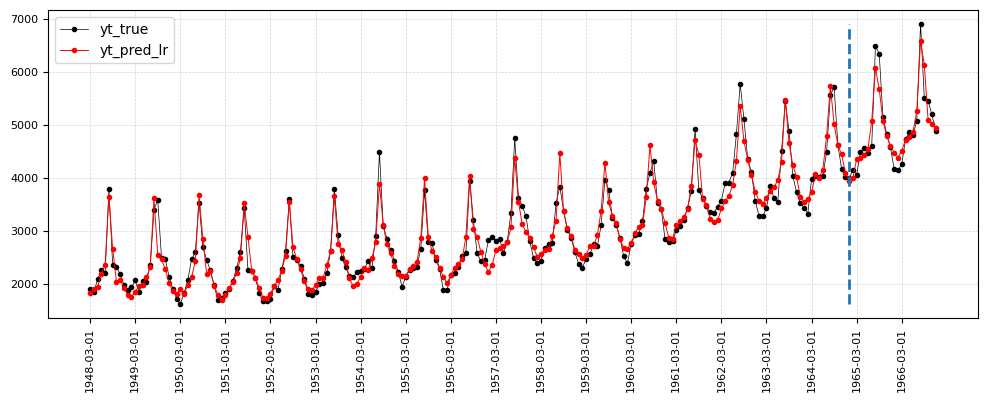

In [4]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
X = df_dropna.drop(columns=["yt_true", "yt_pred_mean"])
y = df_dropna["yt_true"]
model.fit(X, y)
df_dropna["yt_pred_lr"] = model.predict(X)
functions.plot_time_series(df=df_dropna[["yt_true", "yt_pred_lr"]], yt_col="yt_true")
